In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("dl data.xlsx")

In [3]:
df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.200000   0.200000    0.000000         0.0   Feb                 1   
1         0.000000   0.100000    0.000000         0.0   Feb                 2   
2         0.200000   0.200000    0.000000         0.0   Feb                 4   
3         0.050000   0.140000    0.000000         0.0   Feb                 3   
4         0.020000   0.050000    0.000000         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0            1       1            1  Returning_Visitor    False    False  
1            2       1            2  Returning_Visitor    False    False  
2            1       9            3  Returning_Visitor    False    False  
3            2       2            4  Returning_Visitor    False    False  
4            3       1            4  Returning_Visitor     True    False  
...        ...     ...          ...                ...      ...      ...  
12325        6       1            1  Returning_Visitor     True    False  
12326        2       1            8  Returning_Visitor     True    False  
12327        2       1           13  Returning_Visitor     True    False  
12328        2       3           11  Returning_Visitor    False    False  
12329        2       1            2        New_Visitor     True    False  

[12330 rows x 18 columns]

# EDA

In [4]:
df.shape

(12330, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [7]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
df.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

<AxesSubplot:xlabel='PageValues'>

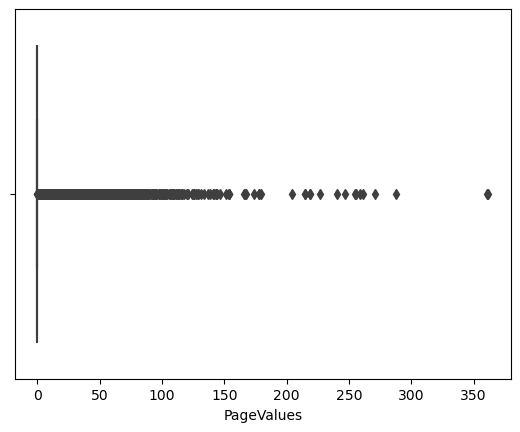

In [9]:
sns.boxplot(df["PageValues"])

In [10]:
df.corr()

Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
OperatingSystems              -0.006347                -0.007343   
Browser                       -0.025035                -0.015392   
Region                        -0.005487                -0.005561   
TrafficType                   -0.033561                -0.014376   
Weekend                        0.026417                 0.014990   
Revenue                        0.138917                 0.093587   

                         Informational  Informational_Duration  \
Administrative                0.376850                0.255848   
Administrative_Duration       0.302710                0.238031   
Informational                 1.000000                0.618955   
Informational_Duration        0.618955                1.000000   
ProductRelated                0.374164                0.280046   
ProductRelated_Duration       0.387505                0.347364   
BounceRates                  -0.116114               -0.074067   
ExitRates                    -0.163666               -0.105276   
PageValues                    0.048632                0.030861   
SpecialDay                   -0.048219               -0.030577   
OperatingSystems             -0.009527               -0.009579   
Browser                      -0.038235               -0.019285   
Region                       -0.029169               -0.027144   
TrafficType                  -0.034491               -0.024675   
Weekend                       0.035785                0.024078   
Revenue                       0.095200                0.070345   

                         ProductRelated  ProductRelated_Duration  BounceRates  \
Administrative                 0.431119                 0.373939    -0.223563   
Administrative_Duration        0.289087                 0.355422    -0.144170   
Informational                  0.374164                 0.387505    -0.116114   
Informational_Duration         0.280046                 0.347364    -0.074067   
ProductRelated                 1.000000                 0.860927    -0.204578   
ProductRelated_Duration        0.860927                 1.000000    -0.184541   
BounceRates                   -0.204578                -0.184541     1.000000   
ExitRates                     -0.292526                -0.251984     0.913004   
PageValues                     0.056282                 0.052823    -0.119386   
SpecialDay                    -0.023958                -0.036380     0.072702   
OperatingSystems               0.004290                 0.002976     0.023823   
Browser                       -0.013146                -0.007380    -0.015772   
Region                        -0.038122                -0.033091    -0.006485   
TrafficType                   -0.043064                -0.036377     0.078286   
Weekend                        0.016092                 0.007311    -0.046514   
Revenue                        0.158538                 0.152373    -0.150673   

                         ExitRates  PageValues  SpecialDay  OperatingSystems  \
Administrative           -0.316483    0.098990   -0.094778         -0.006347   
Administrative_Duration  -0.205798    0.067608   -0.073304         -0.007343   
Informational            -0.163666    0.048632   -0.048219         -0.009527   
Informational_Duration   -0.105276    0.030861 

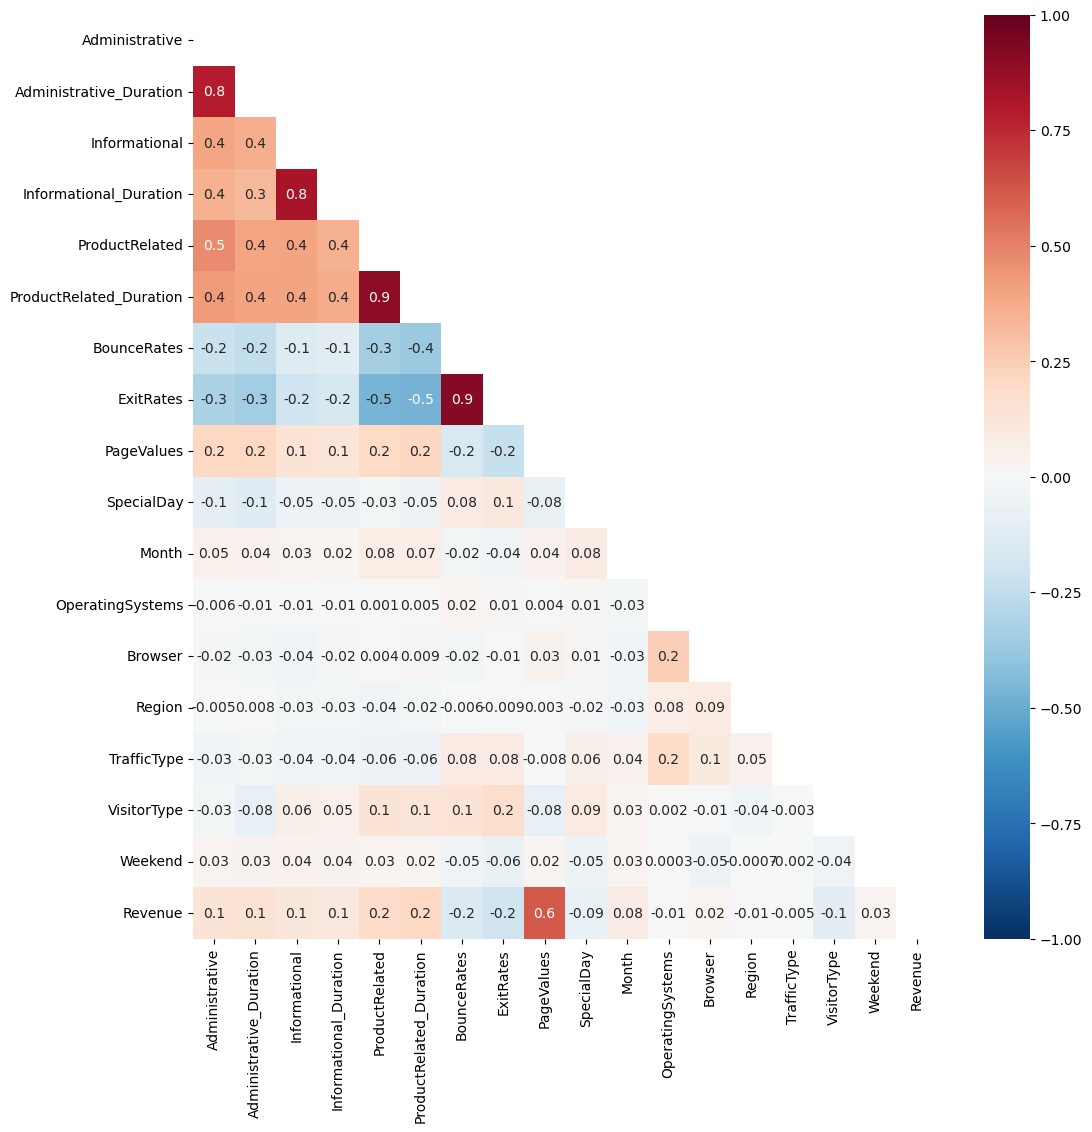

In [74]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

<AxesSubplot:xlabel='Revenue', ylabel='count'>

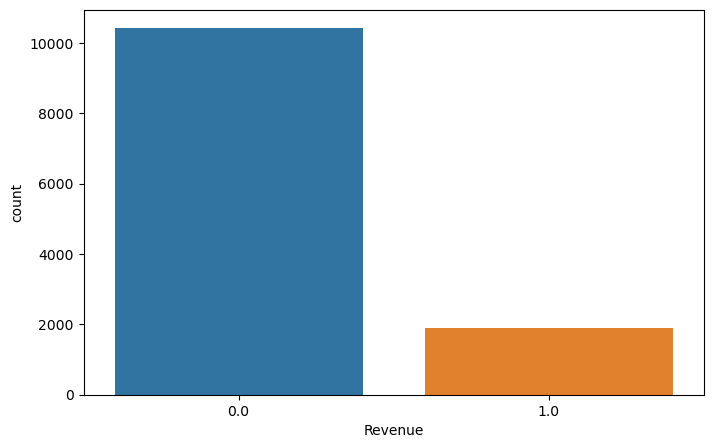

In [72]:
plt.figure(figsize=(8,5))
sns.countplot(df['Revenue'])

In [67]:
df["Revenue"].value_counts()

0.0    10422
1.0     1908
Name: Revenue, dtype: int64

In [13]:
categerical=[]
for i in df:
    if df[i].dtypes=='object':
            categerical.append(i)
    else:
        pass

In [14]:
categerical

['Month', 'VisitorType']

In [15]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[categerical]=oe.fit_transform(df[categerical])

In [16]:
boolean=[]
for i in df:
    if df[i].dtypes=='bool':
            boolean.append(i)
    else:
        pass

In [17]:
boolean

['Weekend', 'Revenue']

In [18]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[boolean]=oe.fit_transform(df[boolean])

In [19]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0    2.0                 1   
1         0.00       0.10         0.0         0.0    2.0                 2   
2         0.20       0.20         0.0         0.0    2.0                 4   
3         0.05       0.14         0.0         0.0    2.0                 3   
4         0.02       0.05         0.0         0.0    2.0                 3   

   Browser  Region  TrafficType  VisitorType  Weekend  Revenue  
0        1       1            1          2.0      0.0      0.0  
1        2       1            2          2.0      0.0      0.0  
2        1       9            3          2.0      0.0      0.0  
3        2       2            4          2.0      0.0      0.0  
4        3       1            4          2.0      1.0      0.0

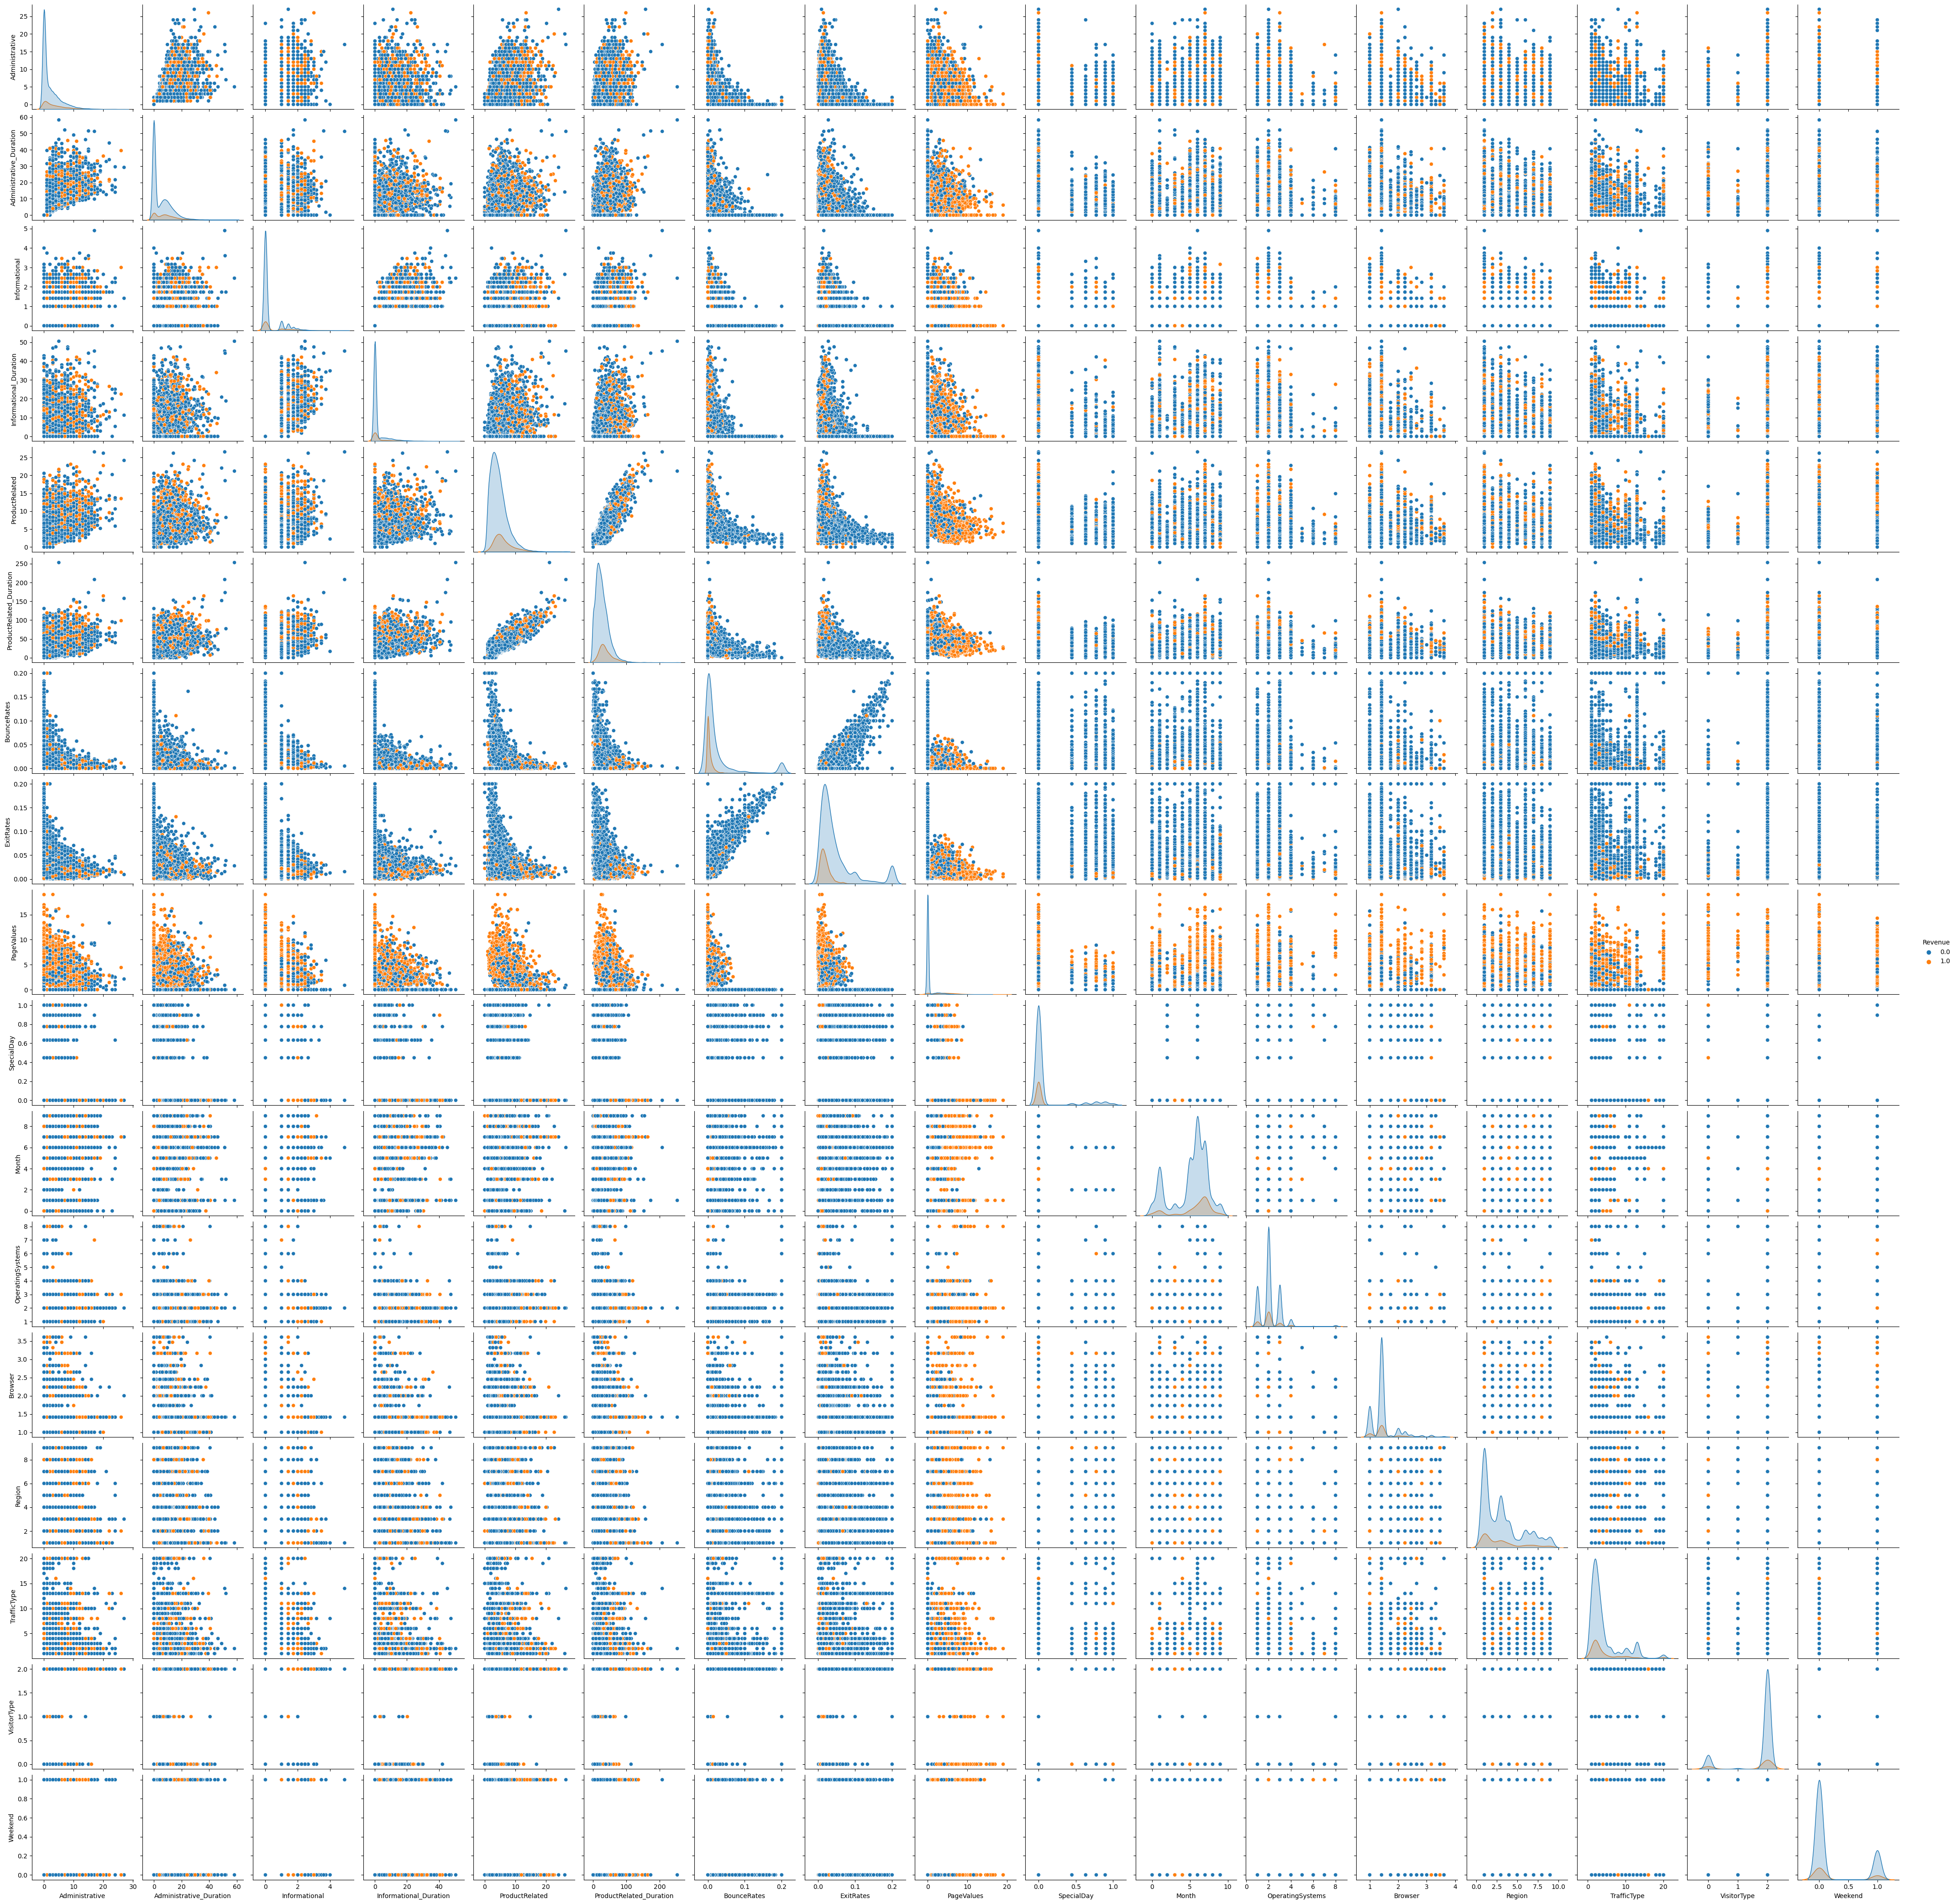

In [68]:
sns.pairplot(df, hue="Revenue")

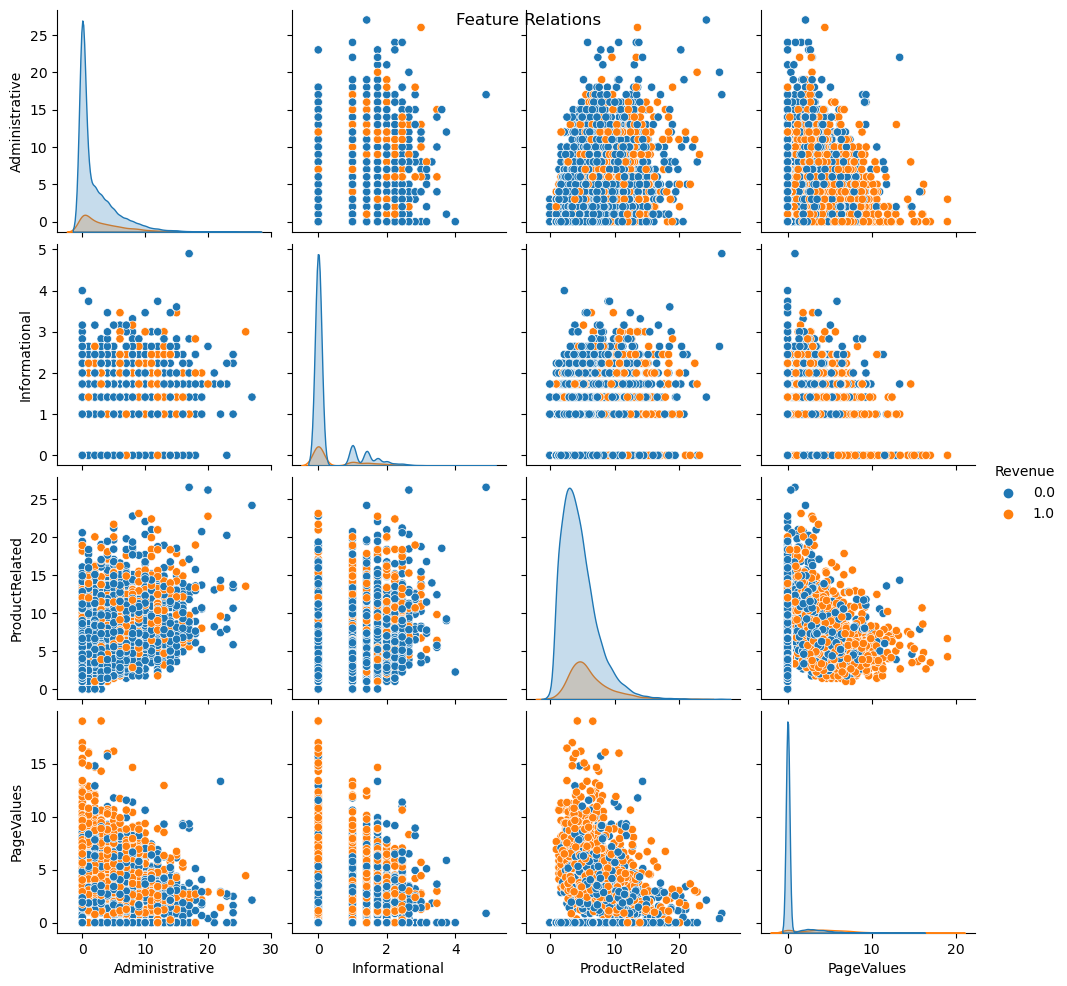

In [75]:
g1 = sns.pairplot(df[['Administrative', 'Informational', 'ProductRelated', 'PageValues', 'Revenue']], hue='Revenue')
g1.fig.suptitle('Feature Relations')
plt.show()

# Splitting the data 

In [21]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  Month  \
0         0.200000   0.200000    0.000000         0.0    2.0   
1         0.000000   0.100000    0.000000         0.0    2.0   
2         0.200000   0.200000    0.000000         0.0    2.0   
3         0.050000   0.140000    0.000000         0.0    2.0   
4         0.020000   0.050000    0.000000         0.0    2.0   
...            ...        ...         ...         ...    ...   
12325     0.007143   0.029031   12.241717         0.0    1.0   
12326     0.000000   0.021333    0.000000         0.0    7.0   
12327     0.083333   0.086667    0.000000         0.0    7.0   
12328     0.000000   0.021053    0.000000         0.0    7.0   
12329     0.000000   0.066667    0.000000         0.0    7.0   

       OperatingSystems  Browser  Region  TrafficType  VisitorType  Weekend  
0                     1        1       1            1          2.0      0.0  
1                     2        2       1            2          2.0      0.0  
2                     4        1       9            3          2.0      0.0  
3                     3        2       2            4          2.0      0.0  
4                     3        3       1            4          2.0      1.0  
...                 ...      ...     ...          ...          ...      ...  
12325                 4        6       1            1          2.0      1.0  
12326                 3        2       1            8          2.0      1.0  
12327                 3        2       1           13          2.0      1.0  
12328                 2        2       3           11          2.0      0.0  
12329                 3        2       1            2          0.0      1.0  

[12330 rows x 17 columns]

In [22]:
Y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12325    0.0
12326    0.0
12327    0.0
12328    0.0
12329    0.0
Name: Revenue, Length: 12330, dtype: float64

# Scaling 

In [23]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [25]:
X=ss.fit_transform(X)

In [26]:
df.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
Month                     -0.832535
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
VisitorType               -2.065135
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

# Dealing with Skewness 

In [27]:
skew_col=[]
for i in df:
    if df[i].skew()<-3 or df[i].skew()>3:
        skew_col.append(i)

In [28]:
for i in skew_col:
    df[i]=np.sqrt(df[i])

In [29]:
df.skew()

Administrative             1.960357
Administrative_Duration    1.540063
Informational              1.949939
Informational_Duration     3.439995
ProductRelated             1.490813
ProductRelated_Duration    1.393891
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 2.533834
SpecialDay                 2.874783
Month                     -0.832535
OperatingSystems           2.066285
Browser                    2.085838
Region                     0.983549
TrafficType                1.962987
VisitorType               -2.065135
Weekend                    1.265962
Revenue                    1.909509
dtype: float64

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [31]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((8631, 17), (3699, 17), (8631,), (3699,))

# Dealing With Imbalance Data 

<AxesSubplot:xlabel='Revenue', ylabel='count'>

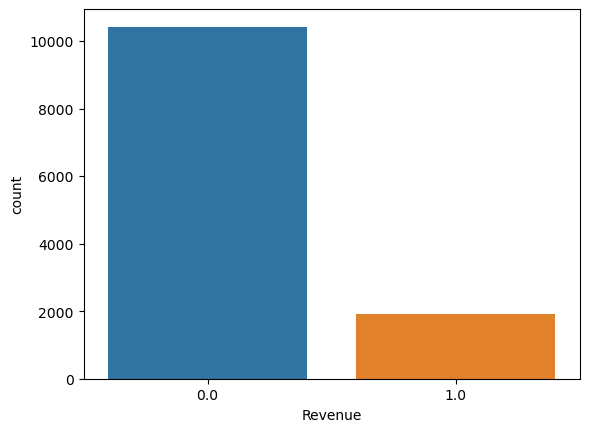

In [32]:
sns.countplot(df['Revenue'])

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, Y_train= smote.fit_resample(X_train, Y_train)


In [34]:
Y_train.value_counts()

0.0    7298
1.0    7298
Name: Revenue, dtype: int64

# Training

In [44]:
#step 1   -   Initialise the ANN model
ann= Sequential() 

#step 2   -   Add layers into model
ann.add(Dense(units = 10, activation= "relu"))
ann.add(Dense(units = 8, activation= "relu"))

ann.add(Dense(units=1 , activation= "sigmoid"))

#step 3   -   establish the connection between the layers 
ann.compile(optimizer="adam", loss= "binary_crossentropy")

#step 4   -   Train the Model 
ann.fit(X_train,Y_train , batch_size= 30 , epochs=150,validation_data=(X_test,Y_test))

Epoch 1/150
487/487 [==============================] - 3s 3ms/step - loss: 0.5527 - val_loss: 0.3909
Epoch 2/150
487/487 [==============================] - 1s 2ms/step - loss: 0.3920 - val_loss: 0.3949
Epoch 3/150
487/487 [==============================] - 1s 2ms/step - loss: 0.3609 - val_loss: 0.3847
Epoch 4/150
487/487 [==============================] - 1s 2ms/step - loss: 0.3457 - val_loss: 0.3554
Epoch 5/150
487/487 [==============================] - 1s 3ms/step - loss: 0.3345 - val_loss: 0.3591
Epoch 6/150
487/487 [==============================] - 1s 2ms/step - loss: 0.3265 - val_loss: 0.3476
Epoch 7/150
487/487 [==============================] - 1s 2ms/step - loss: 0.3219 - val_loss: 0.3625
Epoch 8/150
487/487 [==============================] - 1s 2ms/step - loss: 0.3173 - val_loss: 0.3610
Epoch 9/150
487/487 [==============================] - 1s 2ms/step - loss: 0.3132 - val_loss: 0.3605
Epoch 10/150
487/487 [==============================] - 1s 2ms/step - loss: 0.3105 - val_lo

In [45]:
loss_df=pd.DataFrame(ann.history.history)

<AxesSubplot:>

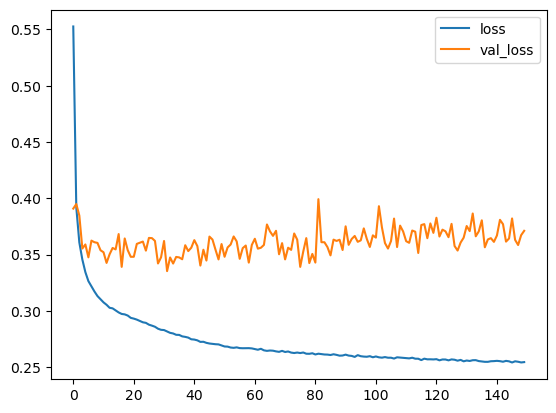

In [46]:
loss_df.plot()

# Regularization  - EarlyStopping

In [47]:
from tensorflow.keras.callbacks import EarlyStopping

In [48]:
earlystop= EarlyStopping(monitor= "val_loss", mode="min" , verbose= 1, patience = 25)

In [49]:
ann.fit(X_train, Y_train , epochs = 150 , validation_data=(X_test,Y_test), callbacks=[earlystop])

Epoch 1/150
457/457 [==============================] - 1s 3ms/step - loss: 0.2542 - val_loss: 0.3875
Epoch 2/150
457/457 [==============================] - 1s 2ms/step - loss: 0.2545 - val_loss: 0.3683
Epoch 3/150
457/457 [==============================] - 1s 2ms/step - loss: 0.2543 - val_loss: 0.3589
Epoch 4/150
457/457 [==============================] - 1s 2ms/step - loss: 0.2546 - val_loss: 0.3644
Epoch 5/150
457/457 [==============================] - 1s 2ms/step - loss: 0.2543 - val_loss: 0.3875
Epoch 6/150
457/457 [==============================] - 1s 2ms/step - loss: 0.2542 - val_loss: 0.3756
Epoch 7/150
457/457 [==============================] - 1s 2ms/step - loss: 0.2540 - val_loss: 0.3679
Epoch 8/150
457/457 [==============================] - 1s 2ms/step - loss: 0.2538 - val_loss: 0.3907
Epoch 9/150
457/457 [==============================] - 1s 2ms/step - loss: 0.2538 - val_loss: 0.3759
Epoch 10/150
457/457 [==============================] - 1s 2ms/step - loss: 0.2541 - val_lo

In [50]:
loss_df_1=pd.DataFrame(ann.history.history)

<AxesSubplot:>

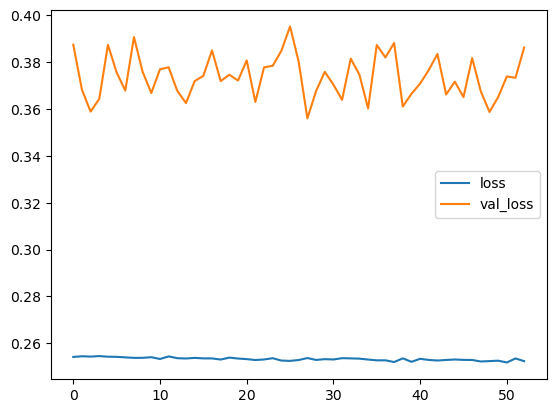

In [51]:
loss_df_1.plot()

# Regularization  - Dropout

In [53]:
from tensorflow.keras.layers import Dropout

In [54]:
#step 1   -   Initialise the ANN model
ann= Sequential() 

#step 2   -   Add layers into model
ann.add(Dense(units = 10, activation= "relu"))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units = 5, activation= "relu"))
ann.add(Dropout(rate=0.3))

ann.add(Dense(units=1 , activation= "sigmoid"))

#step 3   -   establish the connection between the layers 
ann.compile(optimizer="adam", loss= "binary_crossentropy")

#step 4   -   Train the Model 
#ann.fit(X_train,Y_train , batch_size= 30 , epochs=150,validation_data=(X_test,Y_test))

In [55]:
ann.fit(X_train,Y_train, epochs=100 , validation_data = (X_test,Y_test) , callbacks= [earlystop])

Epoch 1/100
457/457 [==============================] - 3s 3ms/step - loss: 0.7324 - val_loss: 0.6124
Epoch 2/100
457/457 [==============================] - 1s 2ms/step - loss: 0.5992 - val_loss: 0.5118
Epoch 3/100
457/457 [==============================] - 1s 3ms/step - loss: 0.5539 - val_loss: 0.4660
Epoch 4/100
457/457 [==============================] - 1s 3ms/step - loss: 0.5219 - val_loss: 0.4360
Epoch 5/100
457/457 [==============================] - 1s 3ms/step - loss: 0.5009 - val_loss: 0.4126
Epoch 6/100
457/457 [==============================] - 1s 2ms/step - loss: 0.4852 - val_loss: 0.3920
Epoch 7/100
457/457 [==============================] - 1s 3ms/step - loss: 0.4813 - val_loss: 0.3852
Epoch 8/100
457/457 [==============================] - 1s 3ms/step - loss: 0.4627 - val_loss: 0.3780
Epoch 9/100
457/457 [==============================] - 1s 3ms/step - loss: 0.4591 - val_loss: 0.3780
Epoch 10/100
457/457 [==============================] - 1s 3ms/step - loss: 0.4538 - val_lo

In [56]:
loss_df_2=pd.DataFrame(ann.history.history)

<AxesSubplot:>

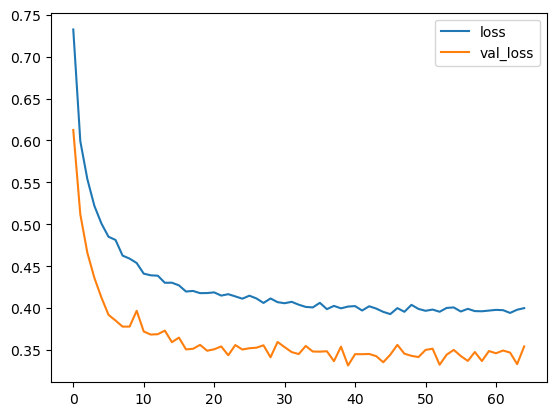

In [58]:
loss_df_2.plot()

In [59]:
#step 5   -   Make prediction 
ypred = ann.predict(X_test)
ypred



116/116 [==============================] - 1s 2ms/step


array([[0.21374975],
       [0.79785365],
       [0.81988245],
       ...,
       [0.00103766],
       [0.93021375],
       [0.24426624]], dtype=float32)

In [61]:
from sklearn.metrics import  classification_report 

#step 6   -   Setting thr threshold 
y_n=ypred>0.5
y_n

#step 7   -  Evaluate the model
print(classification_report(Y_test,y_n))



              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      3124
         1.0       0.55      0.82      0.66       575

    accuracy                           0.87      3699
   macro avg       0.76      0.85      0.79      3699
weighted avg       0.90      0.87      0.88      3699



In [62]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
print(confusion_matrix(Y_test,y_n))

[[2736  388]
 [ 105  470]]
